In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline
import scipy as sp
import scipy.signal as sg

# Accuracy training per batch

In [11]:
with open('./results/experiment1/run_EXPERIMENT_4_1-epoch_val_loss.csv', 'r') as f:
    reader = csv.reader(f)
    lst = list(reader)

exp_1 = lst[1:]

with open('./results/experiment3/run_EXPERIMENT_10_1-tag-epoch_val_loss.csv', 'r') as f:
    reader = csv.reader(f)
    lst = list(reader)
exp_2 = lst[1:]

with open('./results/experiment3/run_EXPERIMENT_11_1-tag-epoch_val_loss.csv', 'r') as f:
    reader = csv.reader(f)
    lst = list(reader)

exp_3 = lst[1:]

with open('./results/experiment3/run_EXPERIMENT_12_1-tag-epoch_val_loss.csv', 'r') as f:
    reader = csv.reader(f)
    lst = list(reader)
exp_4 = lst[1:]



lst[0]

['Wall time', 'Step', 'Value']

In [12]:
print("Elapsed time for EXP1:",round((float(exp_1[len(exp_1)-1][0])-float(exp_1[0][0])),5), "seconds")

Elapsed time for EXP1: 98.52709 seconds


In [13]:
step_cnn1 = []
val_cnn1 = []
t_cnn1 = []
step_cnn2 = []
val_cnn2 = []
t_cnn2 = []
step_cnn3 = []
val_cnn3 = []
t_cnn3 = []
step_cnn4 = []
val_cnn4 = []
t_cnn4 = []

# for i in range(len(fnn_1)):
#     t_fnn1.append((float(fnn_1[i][0])-float(fnn_1[0][0]))/60)
#     step_fnn1.append(float(fnn_1[i][1]))
#     val_fnn1.append(float(fnn_1[i][2]))
    
for i in range(len(exp_1)):
    t_cnn1.append((float(exp_1[i][0])-float(exp_1[0][0]))/60)
    step_cnn1.append(float(exp_1[i][1]))
    val_cnn1.append(float(exp_1[i][2]))
    
for i in range(len(exp_2)):
    t_cnn2.append((float(exp_2[i][0])-float(exp_2[0][0]))/60)
    step_cnn2.append(float(exp_2[i][1]))
    val_cnn2.append(float(exp_2[i][2]))
    
for i in range(len(exp_3)):
    t_cnn3.append((float(exp_3[i][0])-float(exp_3[0][0]))/60)
    step_cnn3.append(float(exp_3[i][1]))
    val_cnn3.append(float(exp_3[i][2]))
    
for i in range(len(exp_4)):
    t_cnn4.append((float(exp_4[i][0])-float(exp_4[0][0]))/60)
    step_cnn4.append(float(exp_4[i][1]))
    val_cnn4.append(float(exp_4[i][2]))

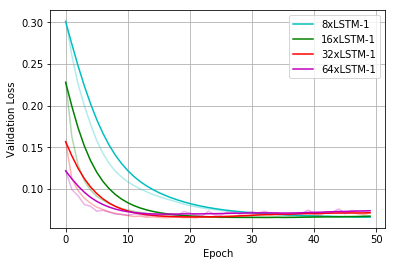

In [14]:
b, a = sg.butter(1, 0.1)

#y_fnn_1 = sg.filtfilt(b, a, val_fnn1)
y_cnn_1 = sg.filtfilt(b, a, val_cnn1)
y_cnn_2 = sg.filtfilt(b, a, val_cnn2)
y_cnn_3 = sg.filtfilt(b, a, val_cnn3)
y_cnn_4 = sg.filtfilt(b, a, val_cnn4)

plt.figure

plt.plot(step_cnn4, val_cnn4, 'c', alpha=0.3, label='_nolegend_')
plt.plot(step_cnn4, y_cnn_4, 'c')

plt.plot(step_cnn2, val_cnn2, 'g', alpha=0.3, label='_nolegend_')
plt.plot(step_cnn2, y_cnn_2, 'g')

plt.plot(step_cnn1, val_cnn1, 'r', alpha=0.3, label='_nolegend_')
plt.plot(step_cnn1, y_cnn_1, 'r')

plt.plot(step_cnn3, val_cnn3, 'm', alpha=0.3, label='_nolegend_')
plt.plot(step_cnn3, y_cnn_3, 'm')


plt.legend(('8xLSTM-1','16xLSTM-1', '32xLSTM-1','64xLSTM-1'), loc='best')
#plt.legend(('FNN','CNN 1','CNN 2','CNN 3'), loc='best')

plt.grid(True)

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.savefig('./outfiles/experiment3/epoch_val_loss.pdf')

In [20]:
1-max(val_cnn3)

-6.189476013183594

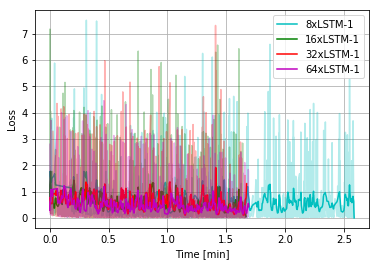

In [6]:
b, a = sg.butter(1, 0.1)

# y_fnn_1 = sg.filtfilt(b, a, val_fnn1)
y_cnn_1 = sg.filtfilt(b, a, val_cnn1)
y_cnn_2 = sg.filtfilt(b, a, val_cnn2)
y_cnn_3 = sg.filtfilt(b, a, val_cnn3)
y_cnn_4 = sg.filtfilt(b, a, val_cnn4)

plt.figure
# plt.plot(t_fnn1, val_fnn1, 'b', alpha=0.3, label='_nolegend_')
# plt.plot(t_fnn1, y_fnn_1, 'b')

plt.plot(t_cnn4, val_cnn4, 'c', alpha=0.3, label='_nolegend_')
plt.plot(t_cnn4, y_cnn_4, 'c')

plt.plot(t_cnn2, val_cnn2, 'g', alpha=0.3, label='_nolegend_')
plt.plot(t_cnn2, y_cnn_2, 'g')

plt.plot(t_cnn1, val_cnn1, 'r', alpha=0.3, label='_nolegend_')
plt.plot(t_cnn1, y_cnn_1, 'r')

plt.plot(t_cnn3, val_cnn3, 'm', alpha=0.3, label='_nolegend_')
plt.plot(t_cnn3, y_cnn_3, 'm')



plt.legend(('8xLSTM-1','16xLSTM-1', '32xLSTM-1','64xLSTM-1'), loc='best')

plt.grid(True)

plt.xlabel('Time [min]')
plt.ylabel('Loss')
plt.savefig('./outfiles/experiment3/batch_time_loss.pdf')